# Script to modify East-taylor temperature forcing for climate change scenarios
## Modified from Danielle Tijerina-Kreuzer's cw3ev2.0 script to adjust columbia/great basin

In [1]:
from parflow.tools.io import read_pfb,write_pfb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# currently untouched wy2003 conus2 forcing used in baseline run, that I copied over to this new file path. 
# These baseline temp files will be overwritten since the file paths are the same
og_forcing_path = '~/EastTaylor_inputs/newbounds_1.5CW3E_WY2018/' 

# where modified forcing will live
modified_forcing_path = '~/EastTaylor_inputs/newbounds_1.5CW3E_WY2018/'

In [3]:
# modify temperature

timestep = 1

for file in range(365):

    tstep1 = str(timestep).zfill(6)
    tstep2 = str(timestep+23).zfill(6)  
        
    conus2_temp_file = read_pfb(og_forcing_path + f'CW3E.Temp.{tstep1}_to_{tstep2}.pfb')
    
    for hour in range(24):
        conus2_temp_file[hour] = conus2_temp_file[hour] + 1.5
        
    write_pfb(modified_forcing_path + f'CW3E.Temp.{tstep1}_to_{tstep2}.pfb',conus2_temp_file,dist=False)
    
    timestep +=24

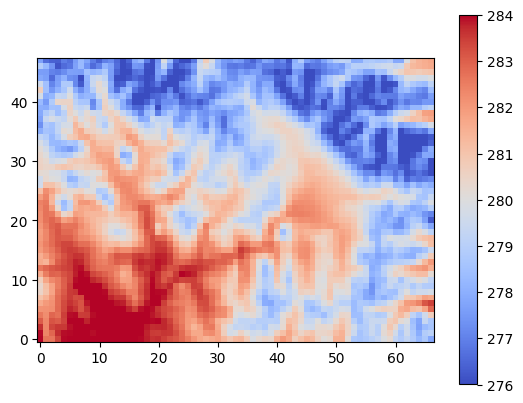

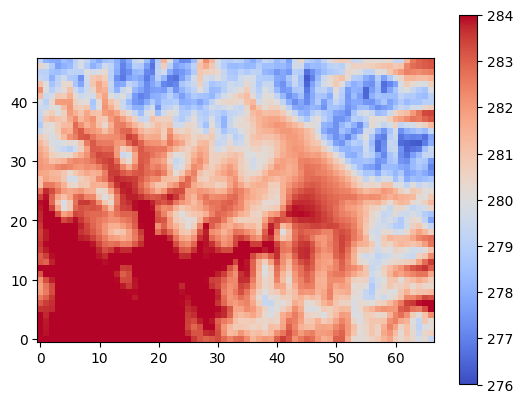

In [5]:
# checking that it worked
og_t1 = read_pfb('~/EastTaylor_inputs/newbounds_CW3E_WY2018/CW3E.Temp.000001_to_000024.pfb')
plt.imshow(og_t1[0], cmap="coolwarm", origin='lower', vmin = 276, vmax = 284)
plt.colorbar()
plt.show()
mod_t1 = read_pfb(modified_forcing_path + f'CW3E.Temp.000001_to_000024.pfb')
plt.imshow(mod_t1[0], cmap="coolwarm", origin='lower', vmin = 276, vmax = 284)
plt.colorbar()
plt.show()